In [1]:
set.seed(888)
# libraries used by different members for the report
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(rvest)
library(stringr)
library(janitor)
library(lubridate)
library(GGally)
library(ISLR)

# libraries for visualization
library(ggplot2)
library(dplyr)
library(tidyr)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Predicting  High-Value Players for the creation of a complex AI that can understand speech and react to complex environement using Minecraft 

# Introduction

**The Research Project**

The Pacific Laboratory for Artificial Intelligence (PLAI) at UBC, led by Professor Frank Wood, is trying to build embodied AI agents that can behave like real human players inside Minecraft. Data was taken from players in a minecraft server called PLAICraft, and the players’ behaviours and traits were recorded. Currently, there are 196 observations of players, and in order to save resources, such as software licenses and server hardware, they need to recruit players who will play on the server for several hours.

**The Question**

We want to know if players' characteristics, like their experience, subscription to the game's newsletter, gender, and age, can predict how long in hours a player would play according to the dataset players?

**The Reasoning**

To better grasp human players' behaviors to build a believable AI, significant amounts of data are needed. This data is collected through interactions the players will have in the server. So it is crucial for the recruited participants to stay online for longer periods of time. The four characteristics of the players (experience, subscription to the game's newsletter, gender, and age) were chosen to be able to provide a comprehensive list of what should be prioritised when recruiting efforts. Since 3 of the variables (experience, gender, age) are self-identified, they may provide bias (social desirability in reporting gender, or overstatement of experience, etc). Only the data set players is needed for this question as it has all the information about the demographic. Sessions could be useful to see players' habits, but just to answer the question of most data collected, player habits would be too specific.


**The Dataset: Players**

There are 196 observations over rows for 7 variables in the columns of a tibble:

|**variable**|**data type**|**categories**|**meaning**|
|-|-|-|-|
| experience | character | 5 | skillset of the player: Beginner, Amateur, Regular, Veteran, Pro|
| subscribe | logical | 2 | indicating active subscription status: TRUE (subscribed) or FALSE (not subscribed) |
| hashedEmail | character | 196 | unique identifications |
| played_hours | real number | n/a | time in hours spent on the server by a player |
| name | character | 196 | unique identifications |
| gender | character | 7 | gender of the player : Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say, Other|
| age | real number | n/a | age of the player |


Potential Issues:
- Gender variable is inclusive but could reduce data accuracy since categories like "Prefer not to say" introduce ambiguity, as they could represent individuals from another gender group
- Positively skewed played_hours, the majority of values are very close to 0h with a few big outliers (around 200h)
- As mentioned, 3 (experience, gender, age) of the variables are self-identified; they may provide bias (social desirability in reporting age or gender, or overstatement of experience, etc).
- Emails and names are self-identified as well, but are not determining characteristics of players that affect play-time/engagement. They identify too specifically and don't represent a "type" of player

# Methods & Results:
To answer the question: Can experience, subscription to the game's newsletter, gender, and age predict how long in hours a player's total played hours will be? K-NN regression will be performed. The predictor variables will be experience, subscription to the game's newsletter, gender, and age, and the class/ label will be played hours. Since the class/label played hours is numerical, using K-NN regression would make sense since the aim is to produce numerical prediction values.

<h3> <u> Loading The Data: </u> </h3>

In [2]:
# Loading The Data 
players <- read_csv("https://raw.githubusercontent.com/ctrl-tiramisu/dsci100-group-008/refs/heads/main/players.csv", show_col_types = FALSE)
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3> <u> Summary Statistics of The Data Set </u> </h3>

The table below shows the summary statistics of the players' played hours in our data set. It can be seen that the range of played hours is quite large, with the minimum being 0 (meaning under 1 hour) and the maximum being 223 hours. This entails that there may be outliers in our data set.

In [3]:
# a summary of the data set relevant for EDA related to the planned analysis

players_relevent_summary <- players |>
  summarise(
    variable = "played_hours",
    mean = mean(played_hours, na.rm = TRUE),
    median = median(played_hours, na.rm = TRUE),
    standard_deviation = sd(played_hours, na.rm = TRUE),
    minimum = min(played_hours, na.rm = TRUE),
    maximum = max(played_hours, na.rm = TRUE))


players_relevent_summary

variable,mean,median,standard_deviation,minimum,maximum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
played_hours,5.845918,0.1,28.35734,0,223.1


<h3> <u> Wrangling and Cleaning The Data </u> </h3>

Generally, the players data set is already tidy with each row having a single observation, each column a single variable, and each value being in a single cell. However, to go a further step into making sure the analysis goes through smoothly, the following code is shown below. In addition, it was discussed earlier that the huge range in our data may be a sign of outliers.
After calculating the upper fence and the lower fence in our data, it was found that hours above 50 are outliers in the data. They are removed from the data because KNN can be sensitive to outliers, as they may affect distance calculations.

In [4]:
players_tidy <- players|>
    mutate(
        Age = as.numeric(Age),
        subscribe = as.logical(subscribe),
        experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")), #levels to ensure R does not order alphabeticall but with progressiong
        gender = factor(gender))|>
    filter(played_hours <50)

head(players_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Furthermore, since the gender variable contains 7 categories, where some of the categories have way too little data. Having too many categories and some of them having way too little data may affect the analysis negatively. To resolve this issue, we combine the genders that have too little data into the "Other" category. Leaving three overall categories under the gender variable- Male, Female, and Other.

In [5]:
## Encode gender variable to Male, Female, and Other
players_tidy <- players_tidy |> mutate(
    gender = case_when(
      gender %in% c("Male") ~ "Male",
      gender %in% c("Female") ~ "Female",
      TRUE ~ "Other"),
    gender = as.factor(gender))
head(players_tidy)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Moreover, since KNN relies on distance calculations and requires numerical data, the values of the categorical variables being used for the analysis (experience, gender, and subscribe) are converted into "dummy" numerical values representing each of the categories under our categorical variables:

In [6]:
#Made Categorical Variables into Numerical
players_number <- players_tidy |> 
mutate(gender = case_when(
      gender %in% c("Male") ~ 1,
      gender %in% c("Female") ~ 2,
      TRUE ~ 3))|>

mutate(experience = case_when(
      experience %in% c("Beginner") ~ 1,
      experience %in% c("Amateur") ~ 2,
      experience %in% c("Regular") ~ 3,
      experience %in% c("Pro") ~ 4,
      experience %in% c("Veteran") ~ 5))|>

mutate(subscribe = case_when(
      subscribe %in% c("TRUE") ~ 1,
      subscribe %in% c("FALSE") ~ 0))


players_number <- players_number|>
    mutate(
        Age = as.numeric(Age),
        subscribe = as.numeric(subscribe),
        experience = as.numeric(experience),
        gender = as.numeric(gender))
head(players_number)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
4,1,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,1,9
5,1,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,1,17
5,0,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,1,17
2,1,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,2,21
3,1,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,1,21
2,1,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,2,17


Next, the NA values in the data that are not useful must be dealt with. Since the players' data set only has two NA values under the Age variable, removing them will suffice. 

In [7]:
## Select for only predictors and target variables
players_selected <- select(players_number, Age, experience, subscribe, gender, played_hours)|>
    drop_na() 
head(players_selected)

Age,experience,subscribe,gender,played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,4,1,1,30.3
17,5,1,1,3.8
17,5,0,1,0.0
21,2,1,2,0.7
21,3,1,1,0.1
17,2,1,2,0.0


<h3> <u> Visualizations for The Data Set </u> </h3>

In [8]:
# visualizations of the dataset that is relevant for exploratory data analysis related to the planned analysis

options(repr.plot.width = 16, repr.plot.height = 6)

# Distribution of Total Played Hours

player_distribution_w_outliers <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 30, fill = "pink", color = "black", alpha = 0.8) +
    labs(title = "Figure 1 (A): Distribution of Total Played Hours (w/ Outliers)",x = "Played Hours",y = "Number of Players") +
  theme_minimal(base_size = 12) +
  geom_vline(aes(xintercept = mean(played_hours)), 
             color = "red", linetype = "dashed", size = 1) +
  annotate("text", x = 150, y = 65, label = "Mean = 6.52", color = "red", size = 4)

player_distribution_no_outliers <- players_tidy |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 30, fill = "pink", color = "black", alpha = 0.8) +
    labs(title = "Figure 1 (B): Distribution of Total Played Hours (Removed Outliers)",x = "Played Hours",y = "Number of Players") +
  theme_minimal(base_size = 12) +
  geom_vline(aes(xintercept = mean(played_hours)), 
             color = "red", linetype = "dashed", size = 1) +
  annotate("text", x = 150, y = 65, label = "Mean = 6.52", color = "red", size = 4)



# Played Hours by Player Experience Level
players_experience_hours1 <- players |>
  ggplot(aes(x = experience, y = played_hours)) +
  geom_point() +
  labs(title = "Figure 2 (A) : Played Hours by Player Experience Level (w/ Outliers)", x = "Experience Level", y = "Total Played Hours") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

players_experience_hours2 <- players_tidy |>
  ggplot(aes(x = experience, y = played_hours)) +
  geom_point() +
  labs(title = "Figure 2 (B) : Played Hours by Player Experience Level (Removed Outliers)", x = "Experience Level", y = "Total Played Hours") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Played Hours by Newsletter Subscription


players_subscribe_hours1 <- players_tidy |>
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_point(alpha = 0.8,) +
  labs(title = "Figure 3 : Played Hours by Newsletter Subscription (Removed Outliers)", x = "Subscribed to Newsletter", y = "Total Played Hours") +
  theme_minimal(base_size = 12)

# Played Hours vs. Age
players_age_played1 <- players |>
  ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(title = "Figure 4 (A) : Played Hours vs. Age (w/ Outliers)", x = "Age (years)", y = "Total Played Hours") +
  theme_minimal(base_size = 12)

players_age_played2 <- players_tidy |>
  ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(title = "Figure 4: Played Hours vs. Age (Removed Outliers)", x = "Age (years)", y = "Total Played Hours") +
  theme_minimal(base_size = 12)

# Average Played Hours by Gender

players_gender <- players|>
    mutate(
        Age = as.numeric(Age),
        subscribe = as.logical(subscribe),
        experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")), #levels to ensure R does not order alphabeticall but with progressiong
        gender = factor(gender))|>
    filter(played_hours <50)

gender_played1 <- players |>
  group_by(gender) |>
  summarise(mean_hours = mean(played_hours)) |>
  ggplot(aes(x = gender, y = mean_hours)) +
  geom_bar(stat = "identity", fill = "orange", color = "black") +
  labs(title = "Figure 5 (A) : Average Played Hours by Gender (w/ Outliers)", x = "Gender", y = "Average Played Hours") +
  theme_minimal(base_size = 12) 

gender_played2 <- players_gender |>
  group_by(gender) |>
  summarise(mean_hours = mean(played_hours)) |>
  ggplot(aes(x = gender, y = mean_hours)) +
  geom_bar(stat = "identity", fill = "orange", color = "black") +
  labs(title = "Figure 5 (B): Average Played Hours by Gender (Removed Outliers)", x = "Gender", y = "Average Played Hours") +
  theme_minimal(base_size = 12) 

# proportions across gender
num_gender <- players_tidy |>
    group_by(gender) |>
    summarise(numgender = n(), mean_hrs = (mean(played_hours)), tot_hrs= (sum(played_hours)))

# proportions across experience
skillset_counts <- players_tidy |>
  group_by(experience) |>
  summarise(n_players = n()) |>
  mutate(percentage = round(100 * n_players / sum(n_players), 1))|>
  ungroup()

experience_proportion <- players_tidy |> 
    group_by(experience) |>
    summarise(num_players = n(), mean_hours_experience = mean(played_hours), total_hrs = sum(played_hours))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Figure 1 (A) below shows that most of the players' played hours are below 25. In fact, most are in the 0-hour play time (meaning they have a total played hours below 1 hour). There are very few players who have a high number of played hours. Figure 1 (B), with the outliers removed, is shown below for reference.

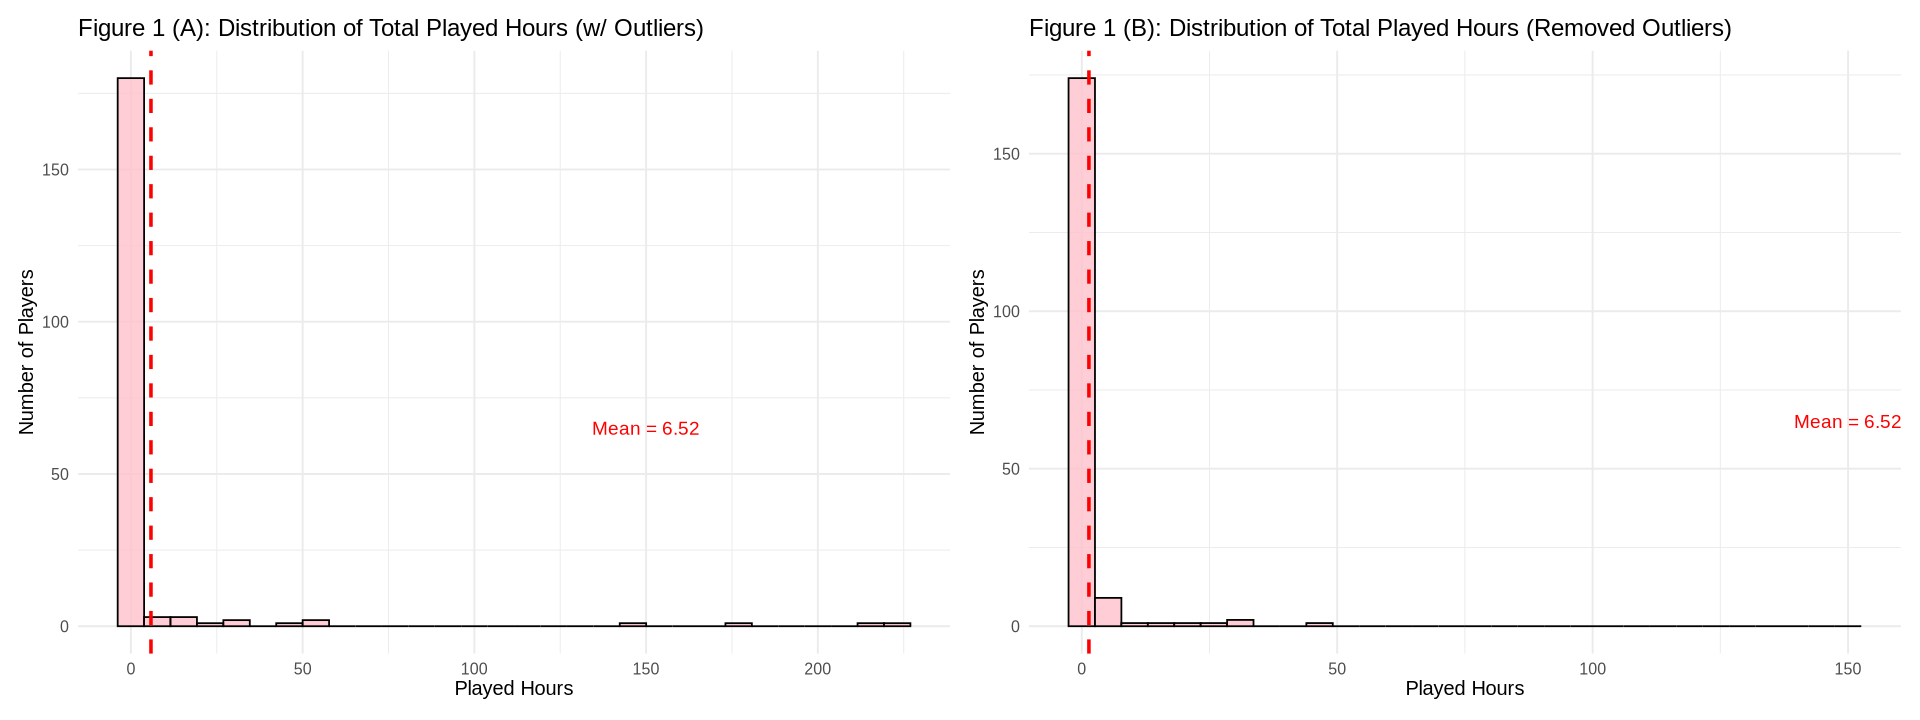

In [9]:
(player_distribution_w_outliers + player_distribution_no_outliers)

Figure 2 (A) shows that with outliers most of the experience levels have played hours around <50 hours. There are, however, players with an unusually high amount of total played hours in Amateur and Regular experience levels. Therefore, we have to remove the outliers as presented in Figure 2 (B). Here, it can be observed that Amateur and Pro players include players with the largest amount of total hours played.

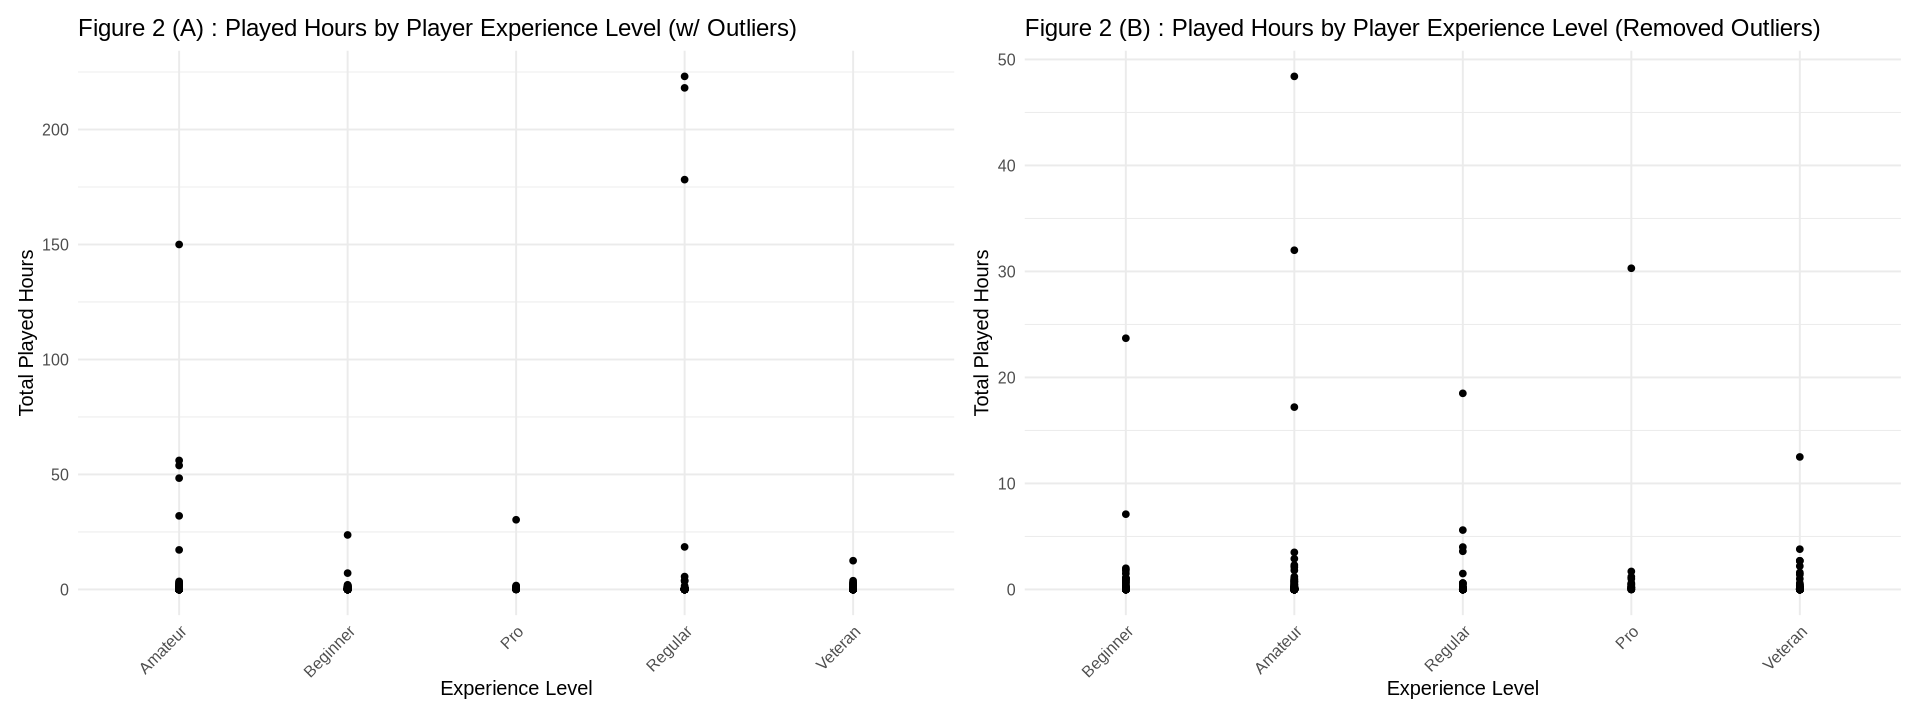

In [10]:
(players_experience_hours1 + players_experience_hours2)

Figure 3 shows that most players are subscribed to the game's newsletter. Subscribers dominate across all played-hour ranges, while non-subscribers appear mostly among players with hours less than 10. 

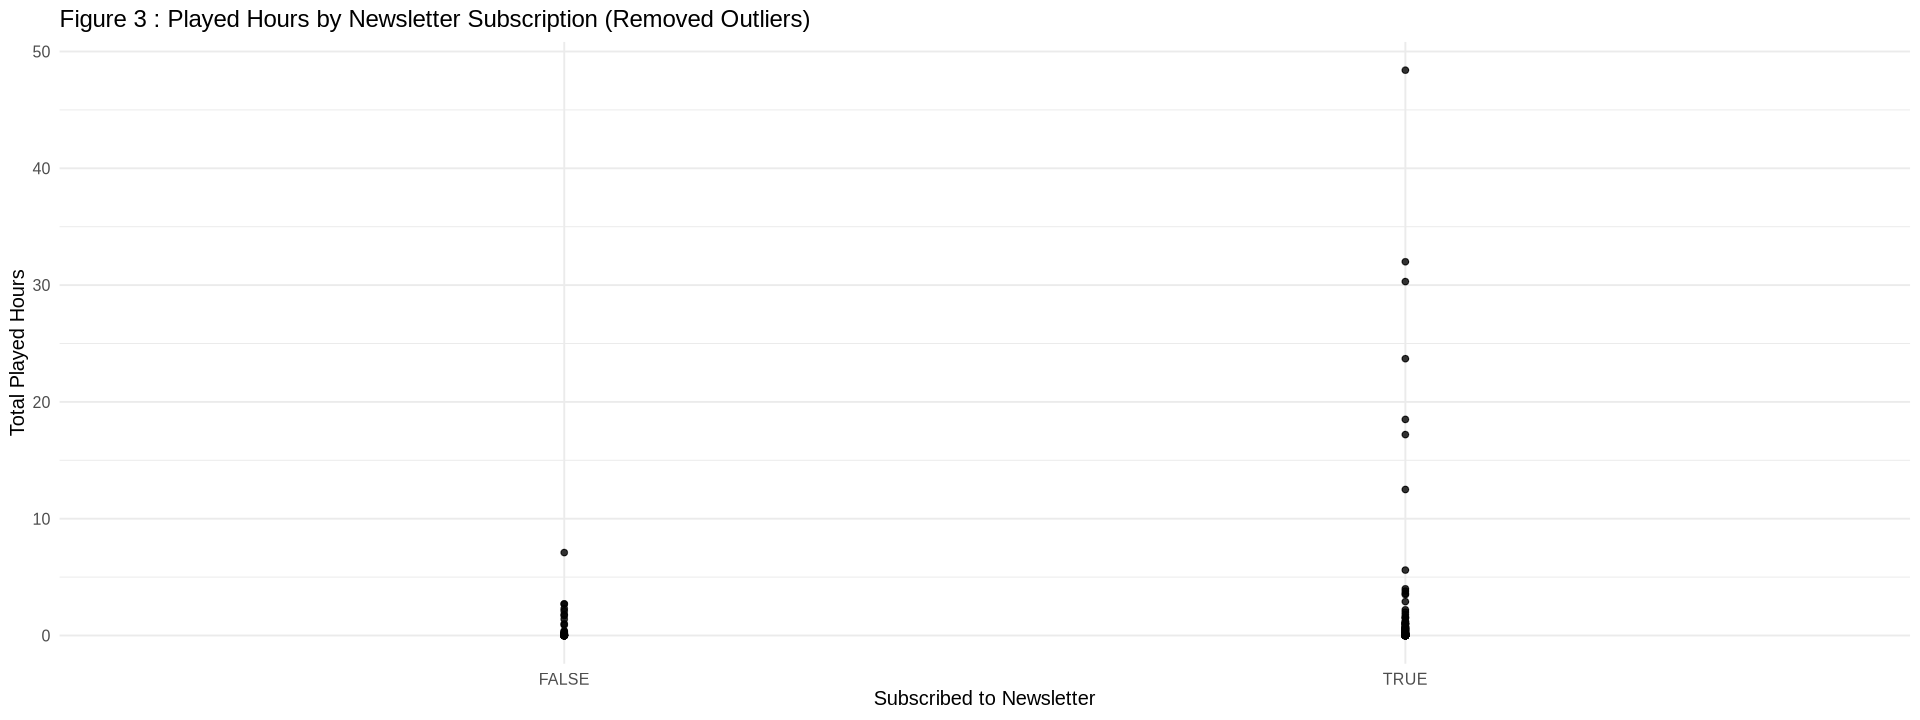

In [11]:
(players_subscribe_hours1)

Figure 4 displays the relationship between players’ ages and their total played hours after removing outliers. The plot shows that most players fall between 10 and 30 years old, and this age range contains the greatest variation in played hours, including the highest observed values. Younger players appear more likely to have higher playtime, with several individuals in their late teens and early twenties showing substantially elevated hours. In contrast, older players are less common in the dataset and tend to have consistently lower played hours. Overall, the figure suggests that heavy gameplay is concentrated among younger users, while older players generally spend less time playing.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


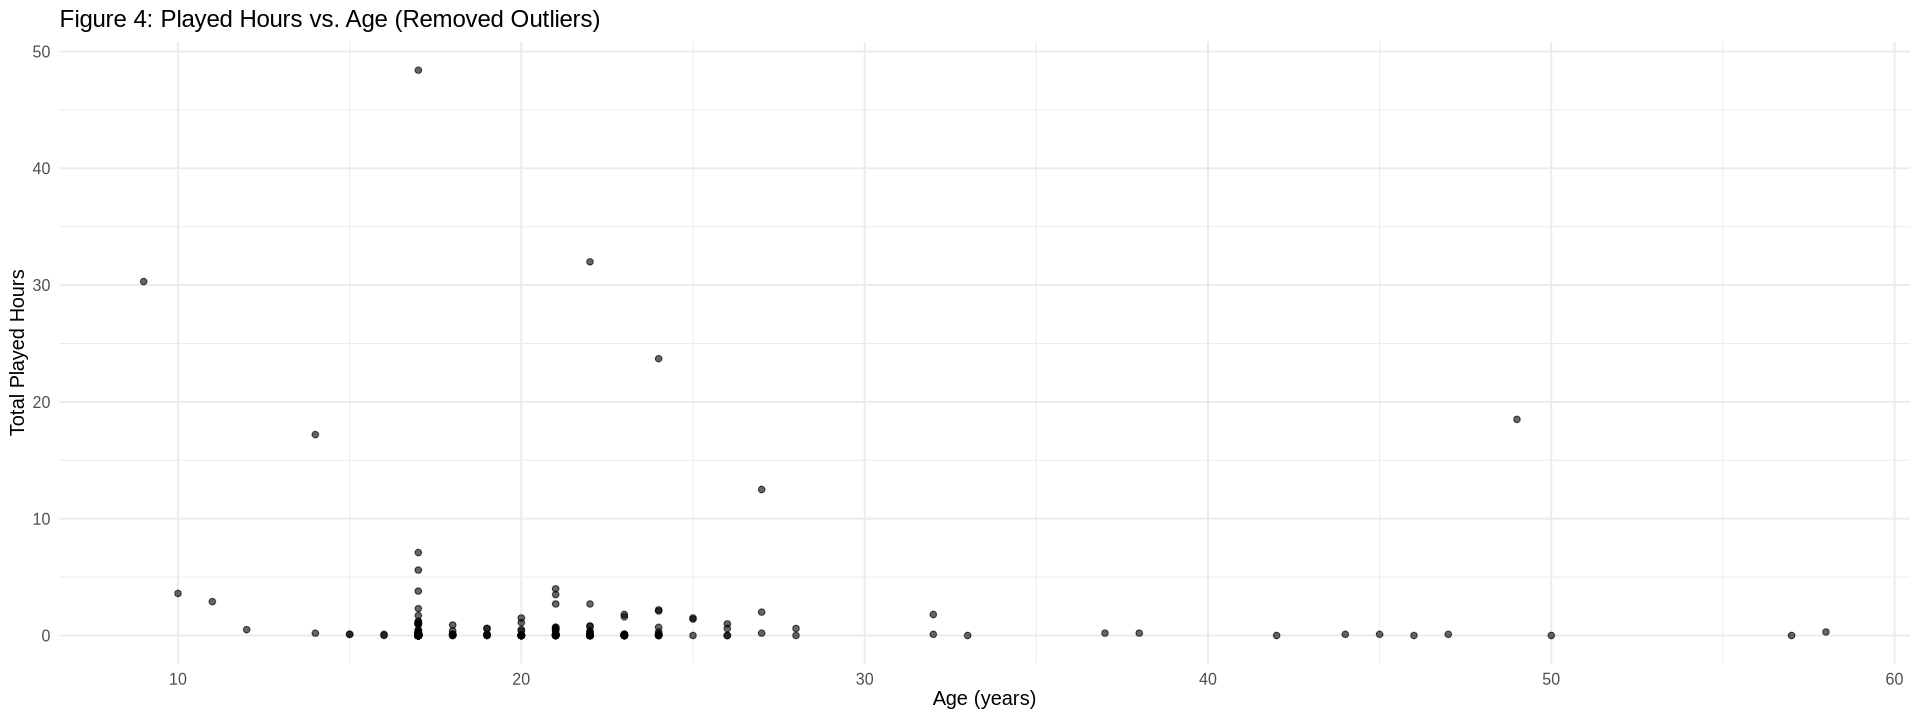

In [12]:
players_age_played2

In Figure 5(A), which includes all observations, the average played hours vary widely across gender groups because several extreme values heavily influence the means. In particular, the Non-binary group shows the highest average played hours, but this is driven by a few very large outliers in a small group. After removing outliers in Figure 5(B), the pattern changes substantially, the Non-binary group’s average drops sharply, revealing that their high value in the first plot was not representative of typical gameplay. Instead, the Agender group now has the highest average played hours, while Female and Male players show more moderate and similar values. The smaller categories: Other, Prefer not to say, and Two-Spirited remain low in both plots. Overall, comparing the two figures shows how outliers and small group sizes can distort averages, and how removing extreme values gives a clearer picture of typical gameplay behavior across genders.

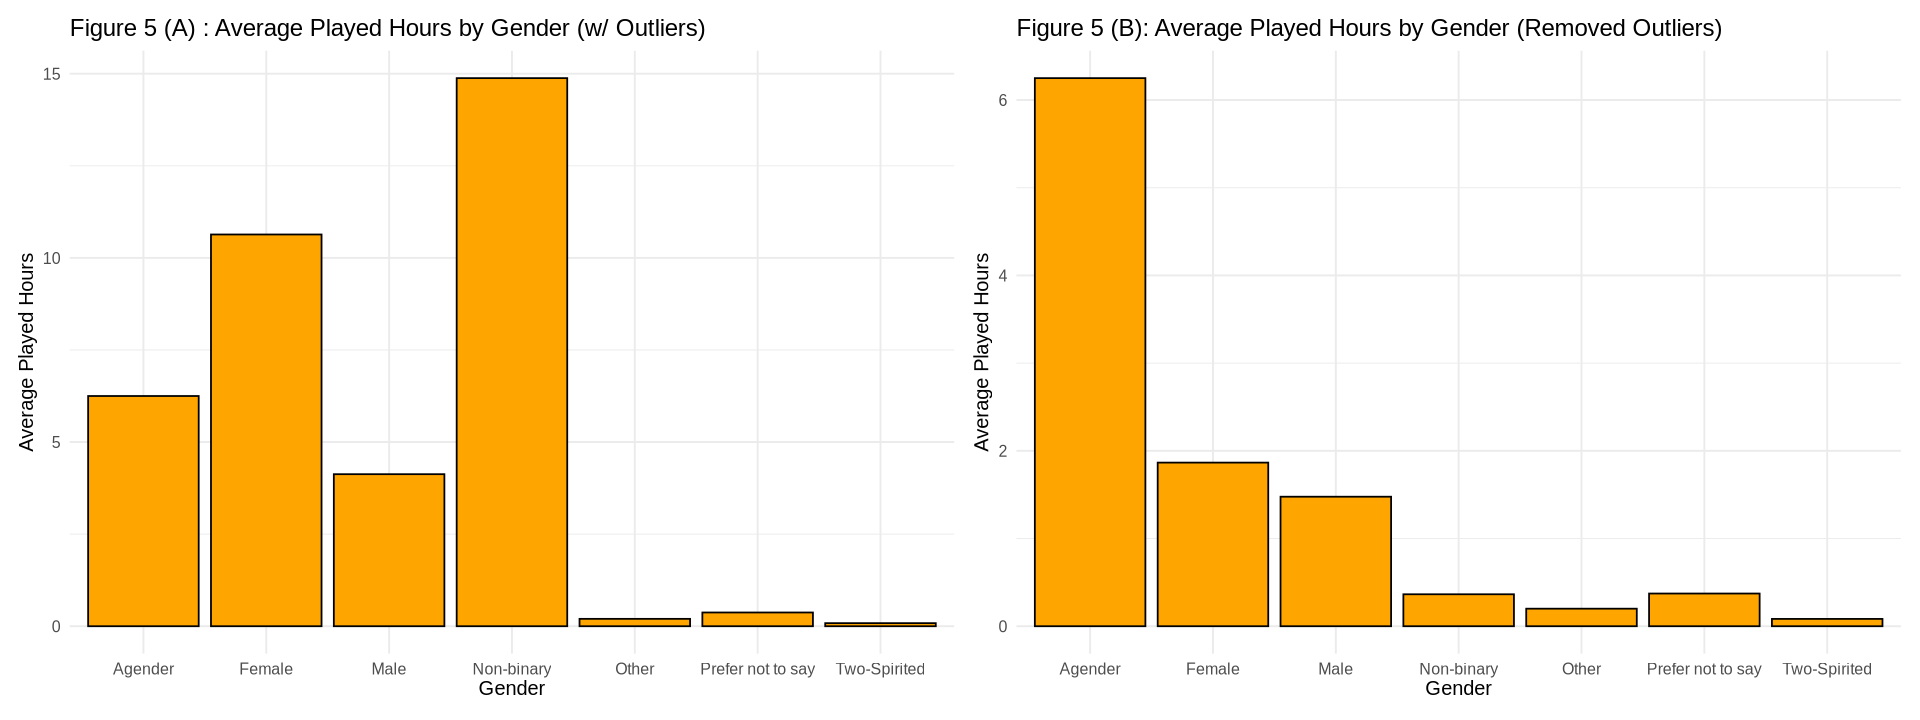

In [13]:
(gender_played1 + gender_played2)

**The Proportions** 

The dataframe summarizes gameplay hours by gender and shows clear differences that help describe how gender relates to total hours played. Males represent the largest group (121 players), which results in the highest total hours played (178.7), even though their average playtime per person (1.48 hours) is lower than that of females. Females, with 35 players, contribute 65.3 total hours but have the highest mean hours per person (1.87), indicating that individuals in this group play more on average despite being fewer in number. The “Other” gender group, with 34 players, shows both the lowest total hours (22.4) and the lowest mean hours per person (0.66), suggesting consistently lower engagement. When considered for predicting total hours played, the data indicates that gender differences exist, but the totals are heavily influenced by group size rather than per-person behavior. Because the dataset is aggregated into only three rows, it cannot support a valid predictive model on its own; however, it does demonstrate that gender is associated with meaningful variation in gameplay time, and that individual-level data would be needed for proper prediction.


In [14]:
num_gender

gender,numgender,mean_hrs,tot_hrs
<fct>,<int>,<dbl>,<dbl>
Female,35,1.8657143,65.3
Male,121,1.4768595,178.7
Other,34,0.6588235,22.4


The dataframe summarizes player experience levels and their distribution within the dataset, providing insight into how experience might relate to overall player composition or potential gameplay behaviors. Amateur players make up the largest group with 60 individuals (31.6% of the sample), indicating that a substantial portion of the player base has moderate but not extensive experience. Veterans form the second-largest group at 48 players (25.3%), suggesting that a significant number of players have long-term or advanced experience. Beginners (35 players, 18.4%) and Regular players (33 players, 17.4%) represent similar proportions, showing that newer and moderately experienced players are present in almost equal measure. Pro players make up the smallest group with only 14 individuals (7.4%), indicating that highly competitive or expert-level players are relatively rare. Overall, the distribution shows a wide range of experience levels, with the majority of players situated between beginner and veteran, and only a small portion at the highest skill tier.

In [15]:
skillset_counts

experience,n_players,percentage
<fct>,<int>,<dbl>
Beginner,35,18.4
Amateur,60,31.6
Regular,33,17.4
Pro,14,7.4
Veteran,48,25.3


The dataframe summarizes gameplay hours across different experience levels and highlights how experience relates to both average and total hours played. Amateur players form the largest group with 60 individuals and contribute the highest total hours (119.1), supported by a relatively high mean of 1.99 hours per person. Beginners (35 players) and Regular players (33 players) each contribute moderate total hours—43.7 and 36.1 respectively—with similar average hours per person near 1.1–1.25. Pro players, despite being a small group of only 14, show the highest average hours per person at 2.60, resulting in a total of 36.4 hours, nearly matching the Regular group. Veterans present an interesting contrast: although they form a sizable group (48 players), they have the lowest mean hours (0.65), yielding a comparatively small total of 31.1 hours. Overall, the data shows that experience level is associated with substantial variation in gameplay behavior, with Pro and Amateur players demonstrating notably higher individual engagement, while Veterans—despite their numbers—contribute fewer total hours due to low average playtime.

In [18]:
experience_proportion

experience,num_players,mean_hours_experience,total_hrs
<fct>,<int>,<dbl>,<dbl>
Beginner,35,1.2485714,43.7
Amateur,60,1.9850000,119.1
Regular,33,1.0939394,36.1
Pro,14,2.6000000,36.4
Veteran,48,0.6479167,31.1


<h3> <u> The Data Analysis  </u> </h3>

The following stages are where the K-NN regression analysis will begin. The first step is to split the data into a training set (0.70) and a testing set (0.30). The training set will be used below to find the optimal k-value.

In [19]:
## Split the data 70/30
players_split <- initial_split(players_selected, prop = 0.70, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In the code below, the model is tuned in order to find an optimal k-value that can be used for the K-NN regression model. 

In [20]:

## Find Best k value for KNN Regression

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ ., data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 


## 5 Fold Validation
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
gridvals <- tibble(neighbors = seq(from = 1, to = 16, by = 1))

players_workflow <-  workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_spec)

players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_min <- players_results |>
  filter(mean == min(mean))

players_min

k_min <- players_min$neighbors

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,rmse,standard,5.362912,5,1.216429,Preprocessor1_Model16


After finding the optimal k-value above, this will now be used to predict the played hours in the test data using the variables in the training data. The Figure 6 plot below shows the plot of the tested k values and their RMSEs. From the plot below, we can see which k value produces the lowest RMSE.

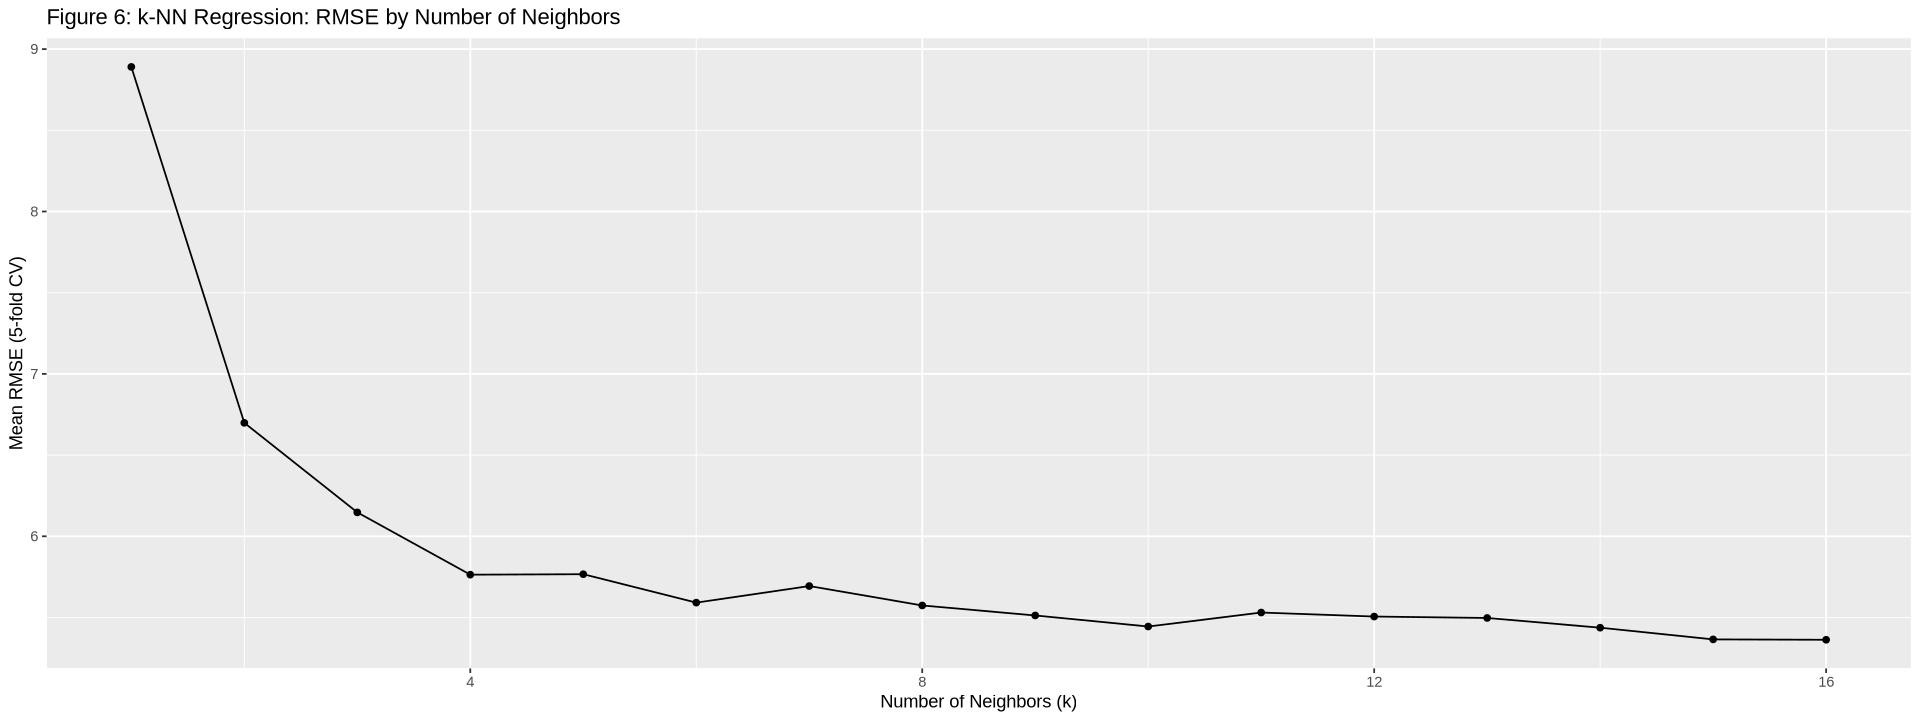

In [21]:
#plot of k neighbors
k_plot <- players_results |>
  filter(.metric == "rmse") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Figure 6: k-NN Regression: RMSE by Number of Neighbors",
    x = "Number of Neighbors (k)",
    y = "Mean RMSE (5-fold CV)")
k_plot

The following code shows the steps in which we now use the optimal k-value we found to predict the players' played hours in the test data using the training data. 

In [22]:
## Predict KNN with K min RSME
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) #|>

players_metrics <- players_summary |>
        metrics(truth = played_hours, estimate = .pred)

head(players_summary)

players_metrics

.pred,Age,experience,subscribe,gender,played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.58125,21,2,1,2,0.7
3.45000,19,3,1,2,0.0
5.03125,25,1,1,2,1.5
1.27500,17,1,1,1,0.0
0.53125,21,5,1,1,0.1
0.43125,20,5,1,1,0.4


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.80357582
rsq,standard,0.01335776
mae,standard,1.96282328


The analysis leaves us with a table above, which includes the predicted values as well as the column played_hours representing the actual values. We also calculated our RMSE, which is also shown above. 

Next, in the code below, we will be conducting visualizations to help us assess the accuracy of our predicted values compared to the actual values for played hours.

In [49]:
# for visualisation purpose redo factors
players_characters <- players_summary |> 
    mutate(genderc = case_when(
      gender %in% c(1) ~ "Male",
      gender %in% c(2) ~ "Female",
      gender %in% c(3) ~ "Other"))|>

    mutate(experiencec = case_when(
      experience %in% c(1) ~ "Beginner",
      experience %in% c(2) ~ "Amateur",
      experience %in% c(3) ~ "Regular",
      experience %in% c(4) ~ "Pro",
      experience %in% c(5) ~ "Veteran"))|>

    mutate(subscribec = case_when(
      subscribe %in% c(1) ~ "subscribed",
      subscribe %in% c(0) ~ "not subscribed"))

players_characters <- players_characters|>
    mutate(
        Age = as.numeric(Age),
        subscribec = as.factor(subscribec),
        experiencec = as.factor(experiencec),
        genderc = as.factor(genderc))
head(players_characters)

.pred,Age,experience,subscribe,gender,played_hours,genderc,experiencec,subscribec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
3.58125,21,2,1,2,0.7,Female,Amateur,subscribed
3.45000,19,3,1,2,0.0,Female,Regular,subscribed
5.03125,25,1,1,2,1.5,Female,Beginner,subscribed
1.27500,17,1,1,1,0.0,Male,Beginner,subscribed
0.53125,21,5,1,1,0.1,Male,Veteran,subscribed
0.43125,20,5,1,1,0.4,Male,Veteran,subscribed


In [51]:
## Plot the KNN Results
options(repr.plot.width = 14, repr.plot.height = 9)
players_pred_plot_age <- players_characters |>
      ggplot(aes(x = Age, y = played_hours, color = genderc)) +
      geom_point() +
      geom_line(aes(x = Age, y = .pred), color = "blue") +
      labs(
        title = "Figure 7: Age Predicted vs Actual Played Hours",
        x = "Age",
        y = "Hours Played [Hours]",
        color = "gender") +
    theme(text = element_text(size = 15))

players_pred_plot_gender <- players_characters |>
      ggplot(aes(x = gender, y = played_hours)) +
      geom_point() +
      geom_line(aes(x = gender, y = .pred), color = "blue") +
      labs(
        title = "Figure 8: Gender Predicted vs Actual Played Hours",
        x = "Gender",
        y = "Hours Played [Hours]") +
    theme(text = element_text(size = 15))


players_pred_plot_subscribe <- players_characters |>
      ggplot(aes(x = subscribe, y = played_hours, color = experiencec)) +
      geom_point() +
      geom_line(aes(x = subscribe, y = .pred), color = "blue") +
      labs(
        title = "Figure 9: Subscription Status Predicted vs Actual Played Hours",
        x = "Subscription Status",
        y = "Hours Played [Hours]", 
        color = "Experience") +
    theme(text = element_text(size = 15))


players_pred_plot_experience <- players_characters |>
      ggplot(aes(x = experience, y = played_hours)) +
      geom_point() +
      geom_line(aes(x = experience, y = .pred), color = "blue") +
      labs(
        title = "Figure 10: Experience Predicted vs Actual Played Hours",
        x = "Experience",
        y = "Hours Played [Hours]") +
    theme(text = element_text(size = 15))



This KNN regression plot in figure 7 shows how well age predicts hours played by comparing individual data points to the model’s predicted line. Each point represents a player’s actual hours played, color-coded by gender, while the blue line represents the KNN-predicted hours across the age range. The scatter of points shows that actual hours vary widely at most ages, with no consistent upward or downward trend, suggesting that age on its own is not a strong predictor of playtime. For example, several players in their mid-teens show near-zero hours while one player at a similar age spikes above 30 hours, illustrating high variability that KNN attempts to smooth but cannot fully capture. The predicted line fluctuates sharply in younger ages—rising and falling as it responds to local clusters of players—but tends to flatten for older ages where data points are sparse. This flattening reflects KNN’s behavior: with fewer neighbors at higher ages, the model pulls predictions toward a low overall baseline.

There is no clear pattern by gender in the plot, as males, females, and “other” players all appear dispersed without systematic differences tied to age. Instead, the spread suggests that individual differences in hours played outweigh any age-based trend. Overall, the model’s erratic early-age predictions and its near-flat shape across the rest of the range indicate that age alone is not an effective predictor of hours played, and that KNN is largely smoothing noise rather than capturing a meaningful relationship.

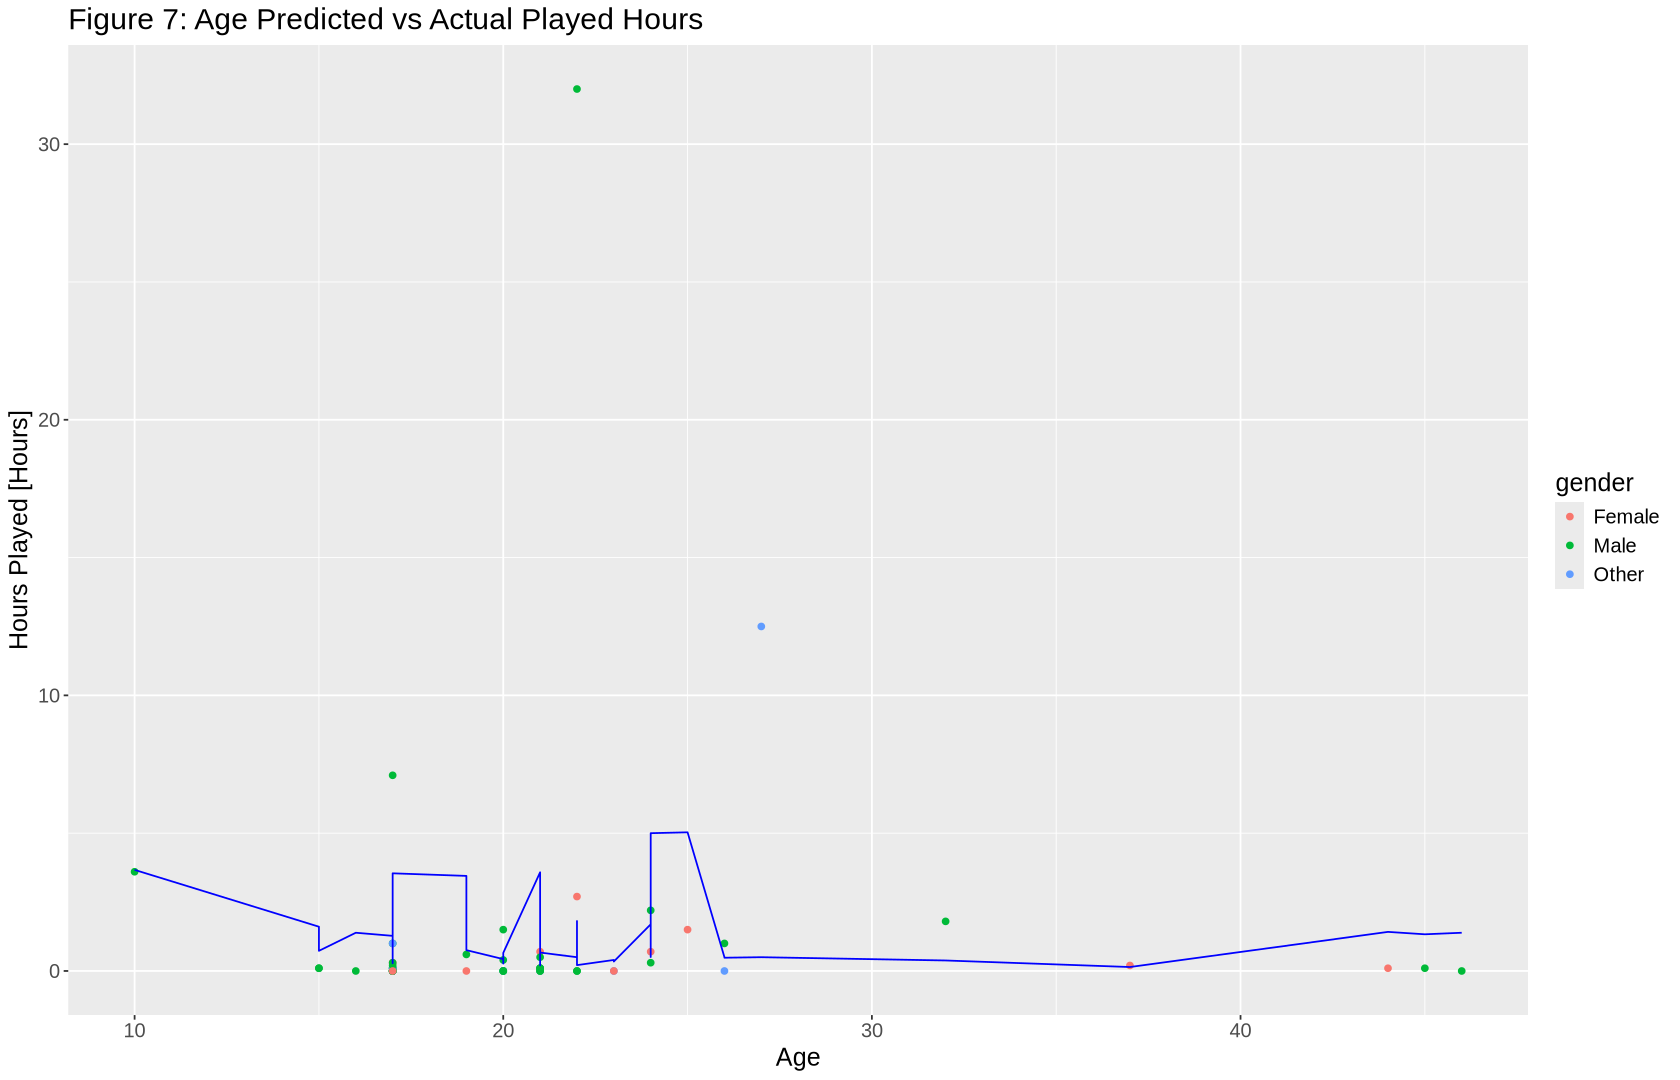

In [52]:
players_pred_plot_age

Figure 8 shows how the model predicts hours played based on gender, using numerical encoding where gender is treated as if it lies on a continuous scale. Each point represents a player’s actual hours played, while the blue line shows the model’s predicted hours for each gender category. Because KNN is designed for continuous inputs, it creates a smoothed prediction curve rather than treating gender as a discrete factor. As a result, the prediction line stays very close to the bottom for gender values 1 (Male)** and 3 (Other), indicating that the model sees very low average hours played among these two groups based on their nearest neighbors in the encoded space.

The only notable deviation is at x = 2 (Female), where the blue line rises slightly. This suggests that the KNN model detects a modest increase in typical hours played among female participants compared to the adjacent categories. This small bump occurs because the female group likely contains individuals with somewhat higher playtime values, and KNN smooths these local patterns into the prediction line. However, the increase is relatively minor, and the predicted values remain low overall.

We also see here the high variance in prediction for the male gender, likely caused by the large variation in the played hours by the males of the dataset. This would likely contribute to the low predictive power of the 

The consistently low curve for males and the “other” category, combined with only a small rise for females, indicates that gender—when handled as a numeric variable—does not provide strong predictive power for hours played. Instead, KNN collapses much of the variation into a near-flat line, reflecting limited differences between groups in the model’s encoded neighborhood space. This is also a sign that KNN is not well suited for categorical predictors without proper encoding strategies (such as one-hot encoding). Overall, the plot suggests weak relationships between gender and played hours, with only a slight localized increase for females.


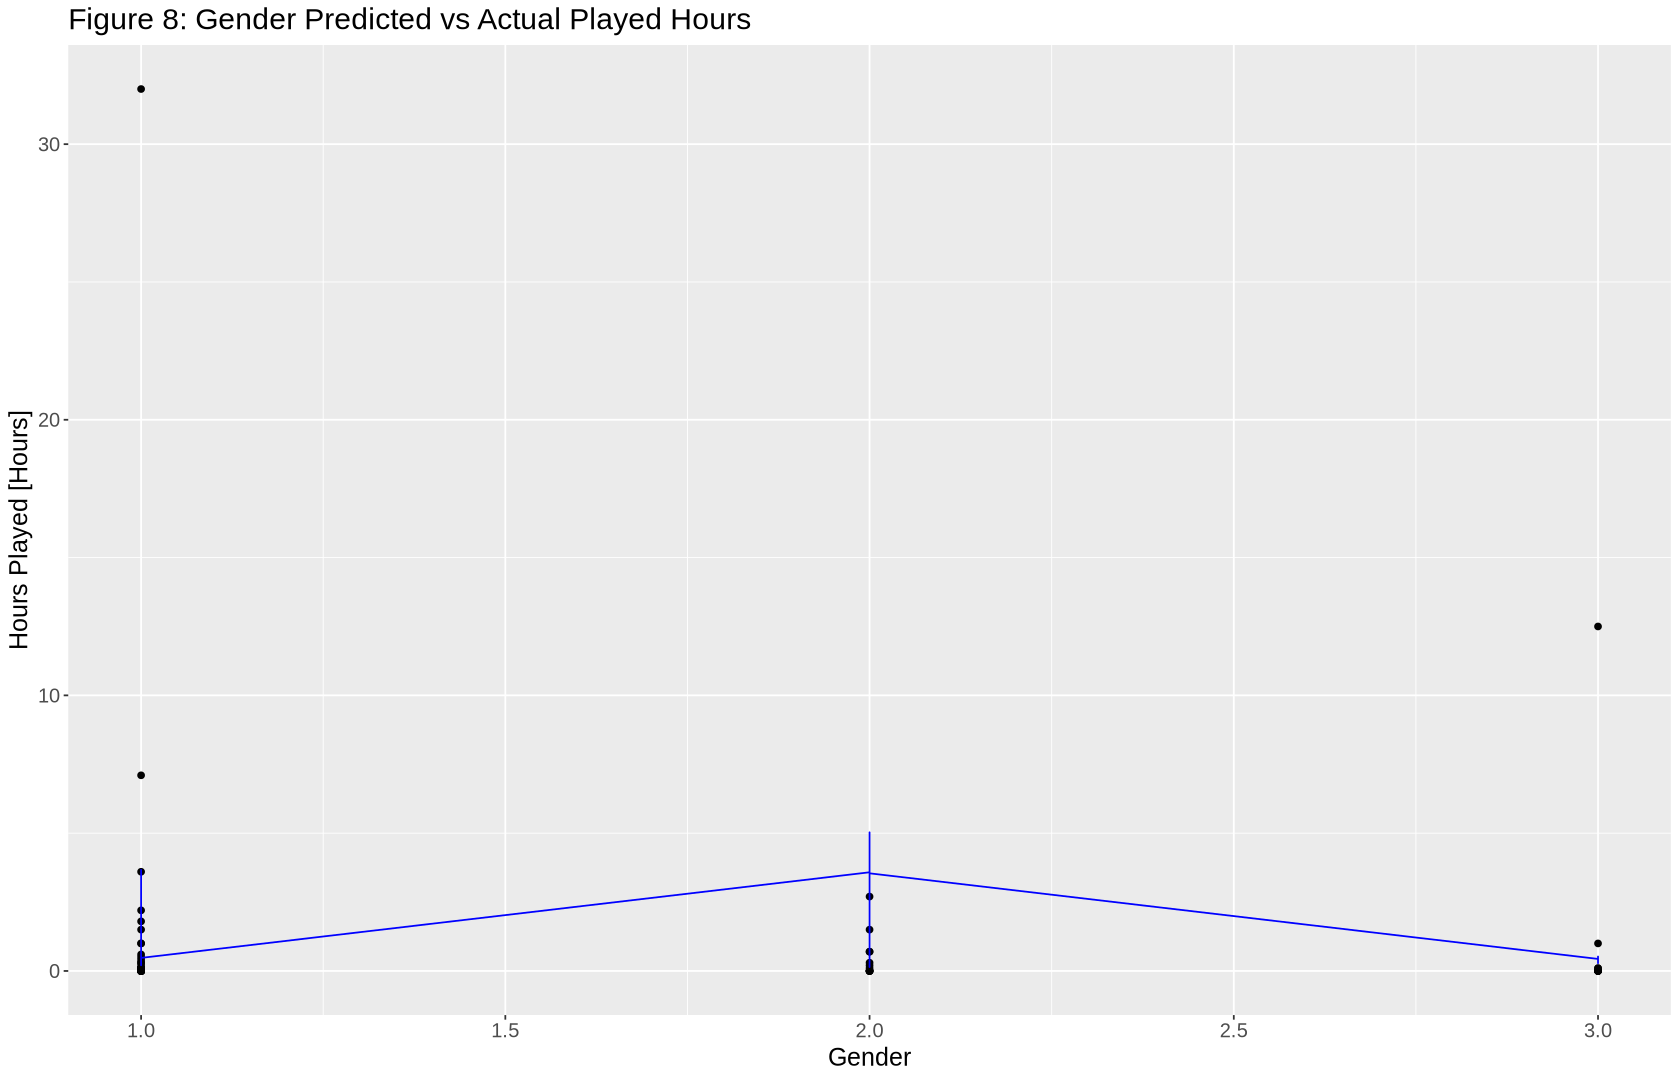

In [53]:
players_pred_plot_gender

Figure 9 shows how well a simple binary variable whether a player is subscribed (1 = True) or not (0 = False) predicts the amount of time spent playing. The scatterplot displays the actual hours played for both groups, while the blue line represents the KNN predicted hours across the two subscription categories. Since subscription status is binary, the model is working with only two discrete x-values, but KNN still produces a smoothed prediction line between them as if the input were continuous.

The blue prediction line shows a small linear increase as it moves from 0 (not subscribed) to 1 (subscribed), indicating that the model detects a slight tendency for subscribed users to play more hours on average than non-subscribed users. However, the change in the line’s height is minimal, which suggests that the difference in playtime between these two groups is modest. This implies that while subscription status may have *some* relationship with hours played—subscribed players showing slightly higher engagement it is not a strong or dominant predictor in the dataset.

The tight clustering of the line near the bottom of the plot further reinforces the idea that the majority of players, regardless of subscription status, log relatively low hours overall. Because of this, KNN produces a nearly flat response, gently sloping upward rather than showing a sharp divide or meaningful separation between the two groups. Overall, the figure suggests that subscription status has only a weak predictive effect on hours played, with KNN capturing a mild upward trend but ultimately finding little distinction between subscribed and non-subscribed players.


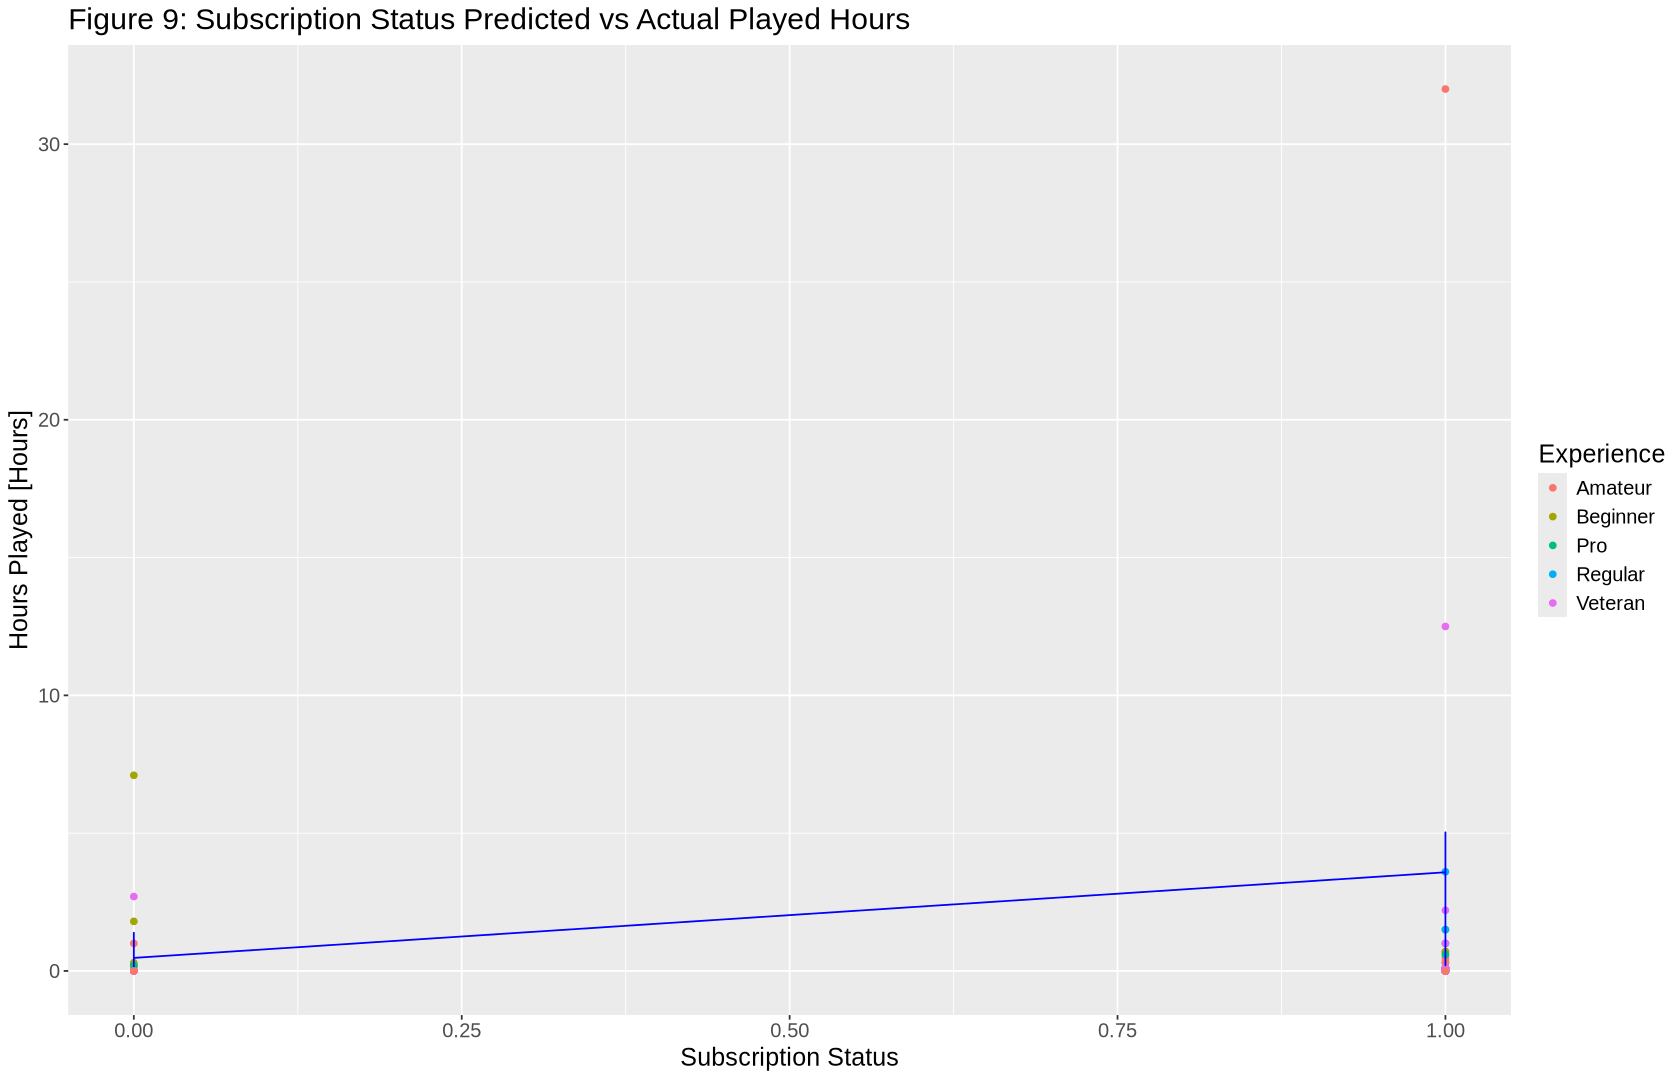

In [54]:
players_pred_plot_subscribe

Figure 10 shows the relationship between player experience level (1–5) and the actual number of hours played, compared against the KNN regression model’s predicted values. Each black dot represents an individual data point (actual recorded hours), while the connected blue line represents the model’s predicted output for each experience category.

Overall, the model appears to capture a general upward trend at lower experience levels, but its predictive accuracy decreases for higher-variance categories:

Experience Level 1 - Beginner:
There is a cluster of low hour values with one noticeable outlier at approximately 6+ hours. The model prediction sits near the center of the cluster, suggesting KNN handled this group reasonably well despite the outlier.

Experience Level 2 - Amateur:
Actual values remain low but slightly more spread out. The predicted value increases compared to Level 1, reflecting the model's assumption that experience positively correlates with playtime — although the true values do not strongly support this trend.

Experience Level 3–4 - Regular and Pro Respectively:
For these mid-level categories, actual hours remain low and nearly flat. However, the predicted regression line suggests a slight upward trend from Level 2 to Level 3 and a sharp drop at Level 4. This indicates that KNN is smoothing based on neighboring categories rather than identifying any meaningful pattern within these points, likely due to insufficient variation in the dataset.

Experience Level 5 - Veteran:
This group contains the largest spread, including a significant high-value outlier (~30+ hours). The model prediction is much lower than this extreme value, meaning KNN failed to account for it — likely because the distance-based averaging reduces the influence of isolated points unless similar values exist nearby.

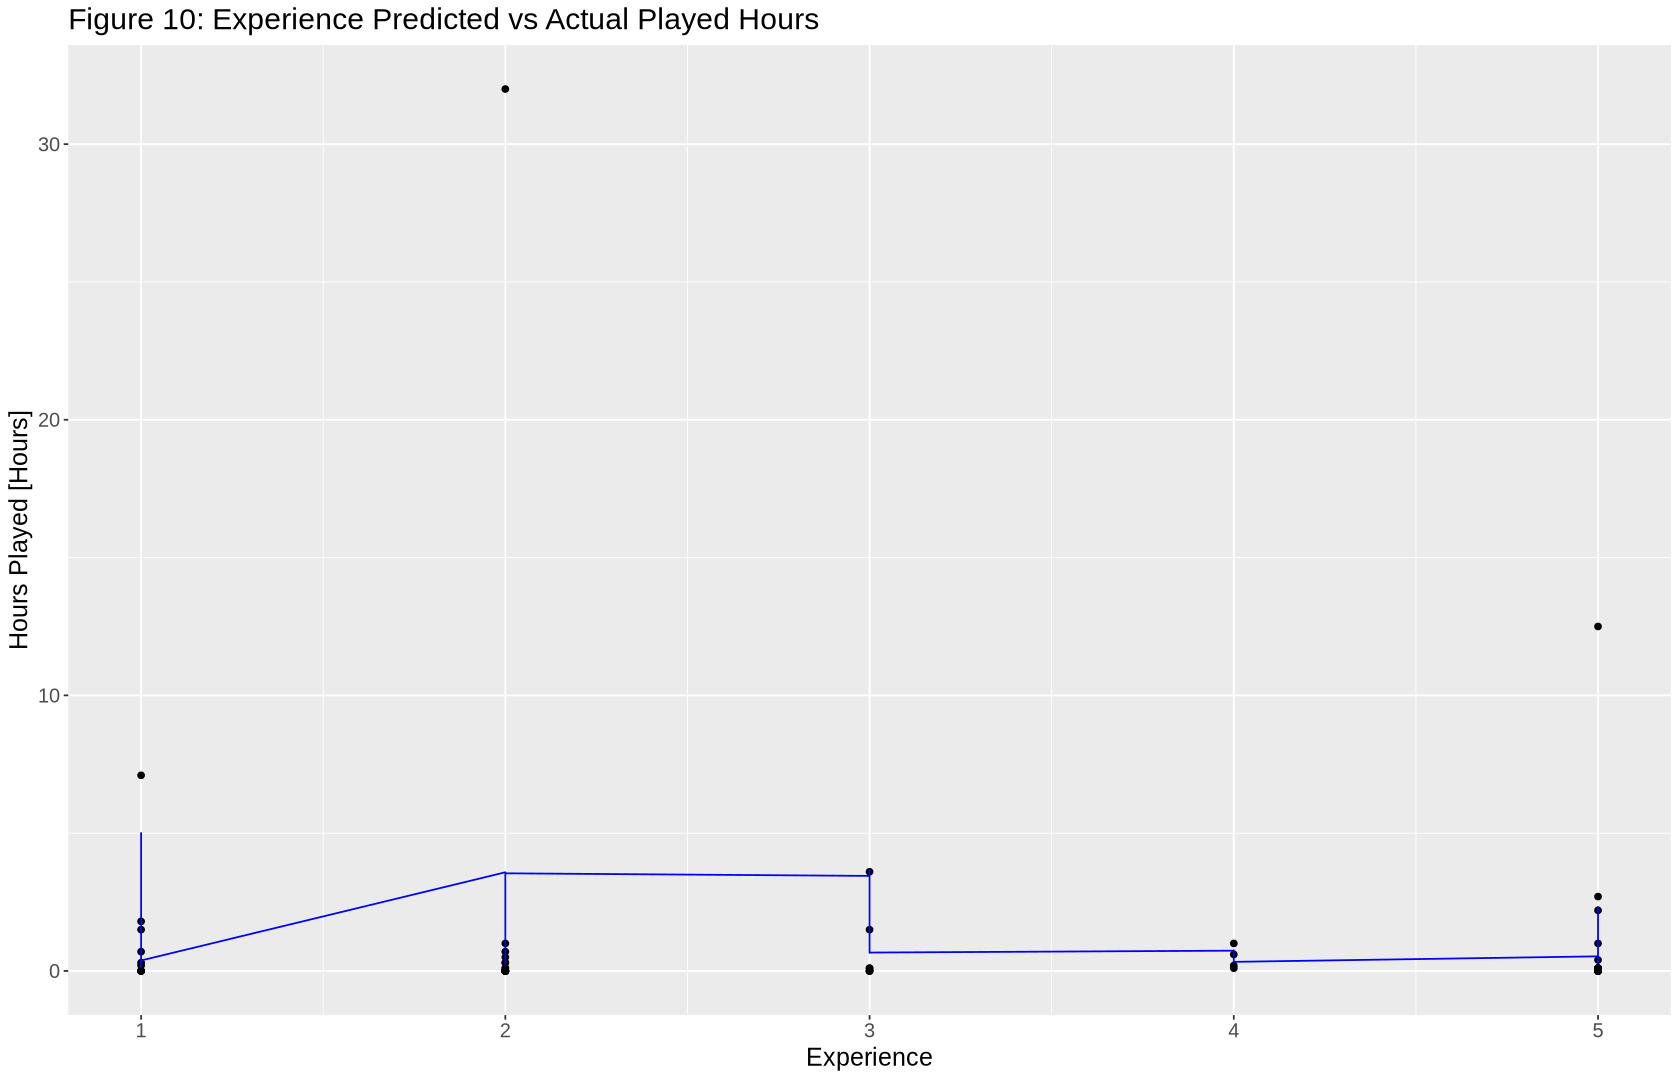

In [55]:
players_pred_plot_experience

# Discussion 


Across all the models and visualizations, the overall findings suggest that demographic and categorical variables such as gender, age, experience level, and subscription status have only weak predictive power for explaining or forecasting the number of hours players spend in the game. While some groups—such as Pro-level players or females in certain categories—show slightly higher average hours, these differences are modest, inconsistent, or strongly influenced by uneven group sizes. The KNN regression plots reinforce this pattern: prediction lines tend to remain near the bottom across most categories, showing minimal variation and indicating that the model is largely smoothing noise rather than capturing strong underlying trends. The age-based KNN line fluctuates irregularly for younger ages but flattens for older ones, suggesting that age does not provide stable predictive value. Gender and subscription status produce nearly flat lines as well, with only slight increases for categories like females or subscribed users. Experience level shows clearer descriptive differences but still lacks strong predictive structure when modeled through KNN.

Overall, the findings largely align with what might be expected when using broad demographic variables on a dataset that likely has high individual variability in playtime. Gaming hours are heavily influenced by personal habits, schedule flexibility, motivation, and situational factors—variables not captured in the demographics alone. Thus, it is not surprising that the models struggle to make strong predictions. The fact that KNN predictions remain low and relatively flat suggests that these demographic factors cannot reliably explain why some players spend significantly more time playing than others.

The impact of these findings is meaningful for anyone designing player engagement strategies, marketing, or game development analytics. Relying on demographic characteristics alone would lead to weak segmentation and ineffective targeting, since these variables do not strongly differentiate high-hours players from low-hours players. Instead, analysts and developers would need to incorporate behavioral features—such as session frequency, in-game actions, progression patterns, or social interactions—to better understand and predict player engagement.

These analyses can lead to many different future questions such as:

 - What behavioral or in-game metrics might serve as stronger predictors of hours played?

- Do patterns emerge when combining demographics with gameplay behavior rather than looking at each dimension separately?

- Are there temporal patterns (e.g., time of day, session length, consistency across weeks) that correlate more strongly with total hours?

- Would alternative modeling approaches (e.g., random forests, gradient boosting, or generalized additive models) reveal non-linear relationships that KNN smooths away?

- How do motivational factors, player goals, or reasons for playing influence engagement levels?


In summary, the data was divided into a training set and a testing set in order to perform K-NN regression to predict a player’s “played hours” based on their experience level, subscription status, gender, and age. An optimal K-value of 16 is found, and K-NN regression is performed to predict the players’ played hours on the test set using the train set.
The KNN regression model did not perform well when predicting total played hours using age, experience, gender, and subscription status. The RMSE is about 5.14, which is very large considering that most players in the dataset only logged between 0 and 5 hours of playtime. This means the model’s average prediction error is often bigger than the actual values themselves. The visualizations support this: across all four predictors, the predicted lines are nearly flat or show irregular, jumpy patterns, while the actual points remain tightly clustered near zero with a few extreme outliers. This indicates that the predictors do not have strong or consistent relationships with played hours, so KNN has difficulty finding useful neighbors to base its predictions on. Overall, the model suggests that age, experience, gender, and subscription status are weak predictors of how many hours a player actually plays, leading to unstable and inaccurate predictions.




# References:

Pacific Laboratory for Artificial Intelligence (PLAI). (2025). PLAICraft. Plaicraft.ai. https://plaicraft.ai/